In [1]:
#inspeccion de estructura del archivo

In [2]:
#primeras operaciones

In [3]:
#Bloque 0: Primer intento de creacion de dataset
import json
import pandas as pd
import os

# ---Se define la ruta a la carpeta de anotaciones ---
base_path = 'lars_v1.0.0_annotations'

# Lista para guardar todos los datos
all_data = []

print(f"Buscando datos en la carpeta: '{base_path}'...")

# Iteramos sobre cada conjunto (train, val, test)
# Las carpetas del dataset de LaRS estan organizadas en tres carpetas principales: train, val y test.
# Se busca encontrar todas los archivos "image_annotations.json" contenidas dentro de los carpetas y agrupar el contenido individual de 
# dichos archivos en la lista 'all_data'.
for subset in ['train', 'val', 'test']:
    json_path = os.path.join(base_path, subset, 'image_annotations.json')
    
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
        # Accedemos a la lista de anotaciones usando la llave 'annotations'
        lista_de_anotaciones = data['annotations']
        
        print(f"  - Archivo '{subset}/image_annotations.json' cargado. {len(lista_de_anotaciones)} muestras encontradas.")
        
        # Iteramos sobre la lista que acabamos de obtener
        for annotation in lista_de_anotaciones:
            row = {}
            # Ahora 'annotation' es el diccionario que contiene 'class' y 'features'
            row['label'] = annotation['class']
            row.update(annotation['features'])
            all_data.append(row)
            
    except FileNotFoundError:
        print(f"  - ERROR: No se encontró el archivo en {json_path}. Verifica la ruta.")

if all_data:
    df = pd.DataFrame(all_data)
    print("\nDataFrame creado exitosamente")
    print("Dimensiones totales del DataFrame:", df.shape)
    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())
else:
    print("\nNo se pudieron cargar datos. Revisa las rutas de las carpetas y archivos.")

Buscando datos en la carpeta: 'lars_v1.0.0_annotations'...
  - Archivo 'train/image_annotations.json' cargado. 2605 muestras encontradas.


KeyError: 'class'

In [4]:

#se registra un error con "class" por lo que se procede a buscar el error.

In [5]:
# Bloque 1: Cargar y ver la estructura
# se inspecciona la carpeta train y el archivo image_annotations.json de la misma a fin de observar el tipo de dato (class), 
# la razon se debe al error en el bloque anterior.
import json
import os

base_path = 'lars_v1.0.0_annotations'
json_path = os.path.join(base_path, 'train', 'image_annotations.json')#se inspecciona la carpeta train y 
                                                                    #el archivo image_annotations.json de la misma

with open(json_path, 'r') as f:
    data = json.load(f)

print("El tipo de dato principal es:", type(data))
print("Las llaves del diccionario son:", list(data.keys()))

El tipo de dato principal es: <class 'dict'>
Las llaves del diccionario son: ['info', 'licenses', 'annotations']


In [6]:
# Bloque 2: Inspeccionar las llaves de una anotación
# Como se observa en el bloque anterior, se encuentra que una de las llaves del diccionario detectado corresponde a 
#"annotations", que es lo que nos interesa anolizar.

# Accedemos a la lista de anotaciones
lista_de_anotaciones = data['annotations']

# Tomamos solo la primera anotación de la lista
primera_anotacion = lista_de_anotaciones[0]

print("La primera anotación es un:", type(primera_anotacion))
print("Sus llaves son:", list(primera_anotacion.keys()))

La primera anotación es un: <class 'dict'>
Sus llaves son: ['id', 'file_name', 'labels']


In [7]:
# Bloque 3: Ver las llaves dentro de 'labels'
# El interes en "annotations" se deriva del hecho de que el dataset analizado es de segmentación semántica, por tanto en este tipo 
# dataset se añaden labels dependiendo de la clase a la que corresponde cada pixel de la imagen (tal y como puede verse en los 
# resultados del bloque anterior.

# Accedemos al diccionario que está dentro de la llave 'labels'
labels_dict = primera_anotacion['labels']

print("La llave 'labels' contiene un:", type(labels_dict))
print("Y sus llaves internas son:", list(labels_dict.keys()))

La llave 'labels' contiene un: <class 'dict'>
Y sus llaves internas son: ['scene_type', 'lighting', 'reflections', 'waves', 'special']


In [8]:
# Creando dataset
# Bloque 4: Cargar todos los datos y crear el DataFrame inicial
import json
import pandas as pd
import os

base_path = 'lars_v1.0.0_annotations'
all_data = []

print(f"Buscando datos en la carpeta: '{base_path}'...")

for subset in ['train', 'val', 'test']:
    json_path = os.path.join(base_path, subset, 'image_annotations.json')
    
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
        
        # Accedemos a la lista de anotaciones usando la llave 'annotations'
        lista_de_anotaciones = data['annotations']
        
        print(f"  - Archivo '{subset}' cargado. {len(lista_de_anotaciones)} muestras encontradas.")
        
        # Añadimos cada diccionario de la lista a nuestra lista global 'all_data'
        all_data.extend(lista_de_anotaciones)
            
    except FileNotFoundError:
        print(f"  - ERROR: No se encontró el archivo en {json_path}.")

# Creamos el DataFrame inicial
df_inicial = pd.DataFrame(all_data)

print("\nDataFrame inicial creado con éxito.")
print("Dimensiones:", df_inicial.shape)
print("\nPrimeras filas:")
print(df_inicial.head())

Buscando datos en la carpeta: 'lars_v1.0.0_annotations'...
  - Archivo 'train' cargado. 2605 muestras encontradas.
  - Archivo 'val' cargado. 198 muestras encontradas.
  - Archivo 'test' cargado. 1203 muestras encontradas.

DataFrame inicial creado con éxito.
Dimensiones: (4006, 3)

Primeras filas:
   id           file_name                                             labels
0   1  yt010_15_00049.jpg  {'scene_type': 'river_like', 'lighting': 'day_...
1   2  yt010_16_00049.jpg  {'scene_type': 'river_like', 'lighting': 'day_...
2   3  yt010_17_00079.jpg  {'scene_type': 'river_like', 'lighting': 'day_...
3   4  yt010_17_00049.jpg  {'scene_type': 'river_like', 'lighting': 'day_...
4   5  yt010_16_00079.jpg  {'scene_type': 'river_like', 'lighting': 'day_...


In [9]:
# Bloque 5: Procesar la columna 'labels' para crear las características

# La función .apply(pd.Series) es de pandas y sirve para expandir una columna de diccionarios
df_labels_expandido = df_inicial['labels'].apply(pd.Series)

# Unimos este nuevo DataFrame con las columnas que nos interesan del original (como 'file_name')
df_final = pd.concat([df_inicial['file_name'], df_labels_expandido], axis=1)

# Finalmente se tiene un DataFrame que está listo para ser usado
print("DataFrame final listo para el modelado:")
print(df_final.head())

print("\nColumnas disponibles:", list(df_final.columns))

DataFrame final listo para el modelado:
            file_name  scene_type  lighting reflections  waves  \
0  yt010_15_00049.jpg  river_like  day_like    moderate  still   
1  yt010_16_00049.jpg  river_like  day_like       heavy  still   
2  yt010_17_00079.jpg  river_like  day_like       heavy  still   
3  yt010_17_00049.jpg  river_like  day_like       heavy  still   
4  yt010_16_00079.jpg  river_like  day_like       heavy  still   

                                             special  
0  {'extra_dark': False, 'extra_bright': False, '...  
1  {'extra_dark': False, 'extra_bright': False, '...  
2  {'extra_dark': False, 'extra_bright': False, '...  
3  {'extra_dark': False, 'extra_bright': False, '...  
4  {'extra_dark': False, 'extra_bright': False, '...  

Columnas disponibles: ['file_name', 'scene_type', 'lighting', 'reflections', 'waves', 'special']


In [10]:
# Bloque 6: Construir el DataFrame final y limpio

base_path = 'lars_v1.0.0_annotations'
all_data_rows = []

print("Procesando archivos para crear el DataFrame final...")

for subset in ['train', 'val', 'test']:
    json_path = os.path.join(base_path, subset, 'image_annotations.json')
    
    try:
        with open(json_path, 'r') as f:
            data = json.load(f)
        
        lista_de_anotaciones = data['annotations']
        print(f"  - Procesando {len(lista_de_anotaciones)} muestras de '{subset}'...")
        
        for annotation in lista_de_anotaciones:
            # Accedemos al diccionario de etiquetas
            labels_dict = annotation['labels']
            
            # Creamos una fila con los datos que nos interesan
            row = {
                'scene_type': labels_dict.get('scene_type'),
                'lighting': labels_dict.get('lighting'),
                'reflections': labels_dict.get('reflections'),
                'waves': labels_dict.get('waves'),
                'special': labels_dict.get('special')
            }
            all_data_rows.append(row)
            
    except FileNotFoundError:
        print(f"  - ERROR: No se encontró el archivo en {json_path}.")

# Se procede a crear el DataFrame final a partir de la lista de filas
df = pd.DataFrame(all_data_rows)

print("\nDataFrame final")
print("Dimensiones:", df.shape)
print("\nPrimeras 5 filas:")
print(df.head())

Procesando archivos para crear el DataFrame final...
  - Procesando 2605 muestras de 'train'...
  - Procesando 198 muestras de 'val'...
  - Procesando 1203 muestras de 'test'...

DataFrame final
Dimensiones: (4006, 5)

Primeras 5 filas:
   scene_type  lighting reflections  waves  \
0  river_like  day_like    moderate  still   
1  river_like  day_like       heavy  still   
2  river_like  day_like       heavy  still   
3  river_like  day_like       heavy  still   
4  river_like  day_like       heavy  still   

                                             special  
0  {'extra_dark': False, 'extra_bright': False, '...  
1  {'extra_dark': False, 'extra_bright': False, '...  
2  {'extra_dark': False, 'extra_bright': False, '...  
3  {'extra_dark': False, 'extra_bright': False, '...  
4  {'extra_dark': False, 'extra_bright': False, '...  


In [11]:
#Bloque 8
df['special']#una de las columnas es inspeccionada debido que su clase es dict

0       {'extra_dark': False, 'extra_bright': False, '...
1       {'extra_dark': False, 'extra_bright': False, '...
2       {'extra_dark': False, 'extra_bright': False, '...
3       {'extra_dark': False, 'extra_bright': False, '...
4       {'extra_dark': False, 'extra_bright': False, '...
                              ...                        
4001    {'extra_dark': False, 'extra_bright': False, '...
4002    {'extra_dark': False, 'extra_bright': False, '...
4003    {'extra_dark': False, 'extra_bright': False, '...
4004    {'extra_dark': False, 'extra_bright': False, '...
4005    {'extra_dark': False, 'extra_bright': False, '...
Name: special, Length: 4006, dtype: object

In [12]:
#BLoque 9
#se proceso a revisar los keys de la columna "special"
i=0
for diccionario in df['special']:
    i=i+1
    print("Claves:", diccionario.keys())
    print("Valores:", diccionario.values())
    print("-" * 20)
    if(i>0):
        break

Claves: dict_keys(['extra_dark', 'extra_bright', 'glitter', 'dirty_lens', 'wakes', 'rain', 'fog', 'plants_debris'])
Valores: dict_values([False, False, False, False, False, False, False, False])
--------------------


In [13]:
#BLoque 10
# --- Paso 1: Aplanar la columna 'special' --- el objetivo es tener el mismo tipo de dato en las columnas del dataframe

# Carga de la columna 'special' como un DataFrame separado
df_special_expandido = df_final['special'].apply(pd.Series)

# Conversión de los valores Booleanos (True/False) a enteros (1/0)
df_special_numerico = df_special_expandido.astype(int)

# Se añade un prefijo para que sepamos de dónde vienen estas columnas
df_special_numerico = df_special_numerico.add_prefix('special_')

# Se lleva a cabo la unión de estas nuevas columnas al resto de las características
# Se elimina la columna original 'special'
X_con_special = pd.concat([df_final.drop(columns=['special']), df_special_numerico], axis=1)

# Finalmente se quita el file_name y la variable objetivo para tener el set de características completo
X_completo = X_con_special.drop(columns=['scene_type', 'file_name'])

print("Nuevas características creadas desde la columna 'special':")
#print(f"  - Columna '{columna}': contiene un {type(primer_valor)}")
print(f"EL tamanio de X_completo es {X_completo.shape}")
print(X_completo.head(20))

Nuevas características creadas desde la columna 'special':
EL tamanio de X_completo es (4006, 11)
     lighting reflections     waves  special_extra_dark  special_extra_bright  \
0    day_like    moderate     still                   0                     0   
1    day_like       heavy     still                   0                     0   
2    day_like       heavy     still                   0                     0   
3    day_like       heavy     still                   0                     0   
4    day_like       heavy     still                   0                     0   
5    day_like    moderate  moderate                   0                     0   
6    day_like    moderate  moderate                   0                     0   
7   dusk_like        none  moderate                   1                     0   
8    day_like    moderate  moderate                   0                     0   
9    day_like    moderate  moderate                   0                     0   
10   day_li

In [14]:
#Bloque 11
df_final['scene_type']#variable objetivo

0       river_like
1       river_like
2       river_like
3       river_like
4       river_like
           ...    
4001      sea_like
4002      sea_like
4003      sea_like
4004      sea_like
4005      sea_like
Name: scene_type, Length: 4006, dtype: object


--- Importancia de cada característica según el modelo ---
           Característica  Importancia
13       reflections_none     0.262978
12   reflections_moderate     0.251060
16            waves_still     0.084743
0      special_extra_dark     0.081926
7   special_plants_debris     0.064610
11      reflections_heavy     0.058442
14         waves_moderate     0.050539
2         special_glitter     0.043113
6             special_fog     0.022980
1    special_extra_bright     0.019432
3      special_dirty_lens     0.018599
5            special_rain     0.012545
4           special_wakes     0.010077
8       lighting_day_like     0.007416
10    lighting_night_like     0.005492
9      lighting_dusk_like     0.005467
15            waves_rough     0.000583


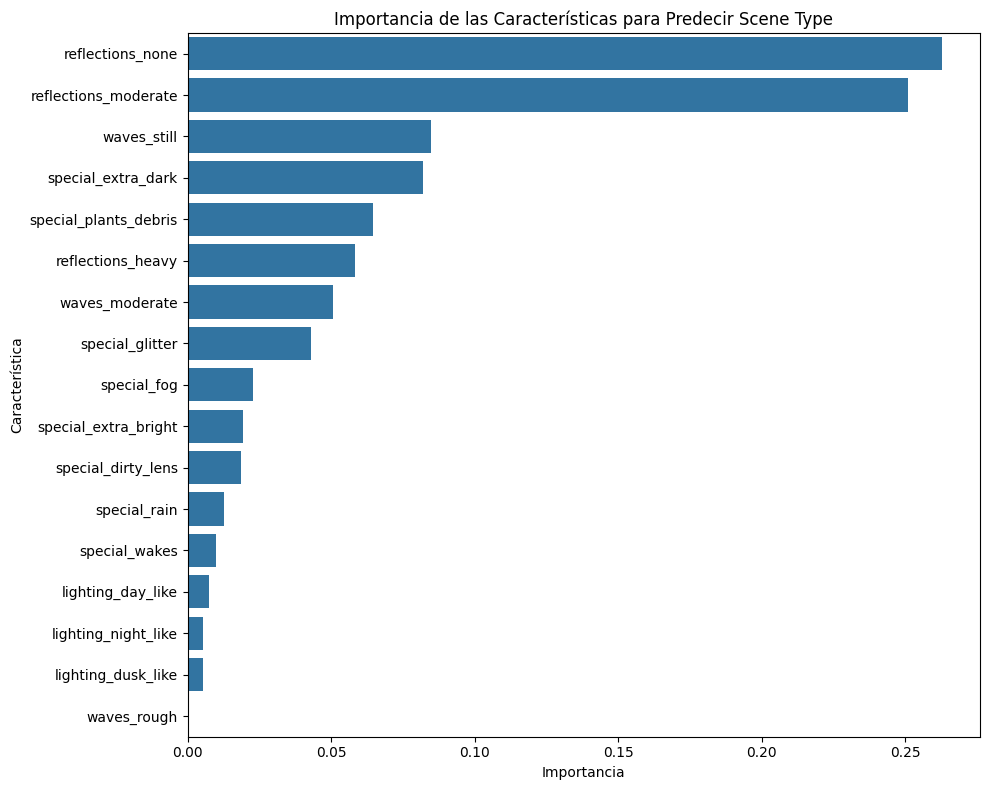

In [15]:
#Bloque 12

# --- Entrenar un modelo y medir la importancia de las caracteristicas ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import numpy as np
########
# 1. Convertir todo a formato numérico (One-Hot Encoding)
X_completo_numerico = pd.get_dummies(X_completo)
y = df_final['scene_type'] # La variable objetivo

# 2. Limpieza de nulos
y_limpio = y.dropna()
X_final_completo = X_completo_numerico.loc[y_limpio.index]
le = LabelEncoder()
y_numerico = le.fit_transform(y_limpio)

# ENTRENAMIENTO
# Se entrena un RandomForest sobre el dataset COMPLETO
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf.fit(X_final_completo, y_numerico)

# OBTENER Y VISUALIZAR LA IMPORTANCIA
importancias = modelo_rf.feature_importances_
nombres_caracteristicas = X_final_completo.columns

# Crear un DataFrame para ver los resultados más fácilmente
df_importancias = pd.DataFrame({
    'Característica': nombres_caracteristicas,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

print("\n--- Importancia de cada característica según el modelo ---")
print(df_importancias)

# Visualización gráfica
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.barplot(x='Importancia', y='Característica', data=df_importancias)
plt.title('Importancia de las Características para Predecir Scene Type')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

In [16]:
# --- Métricas del Modelo Completo ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("--- Evaluando el Modelo con TODAS las características ---")

# 'X_final_completo' y 'y_numerico' son las variables creadas en el paso de análisis de importancia de 
# características.

# 1. División de datos en Entrenamiento y Prueba
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_final_completo, y_numerico, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_numerico
)

# 2. Entrenamiento del Modelo RandomForest
modelo_rf_completo = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf_completo.fit(X_train_c, y_train_c)

# 3. Predicciones
y_pred_c = modelo_rf_completo.predict(X_test_c)

# 4. Evaluación y Métricas
accuracy_completo = accuracy_score(y_test_c, y_pred_c)
print(f"\nAccuracy (Modelo Completo): {accuracy_completo:.4f}")

print("\nReporte de Clasificación (Modelo Completo):")
print(classification_report(y_test_c, y_pred_c, target_names=le.classes_))

--- Evaluando el Modelo con TODAS las características ---

Accuracy (Modelo Completo): 0.7987

Reporte de Clasificación (Modelo Completo):
              precision    recall  f1-score   support

  river_like       0.72      0.47      0.57       340
    sea_like       0.82      0.93      0.87       862

    accuracy                           0.80      1202
   macro avg       0.77      0.70      0.72      1202
weighted avg       0.79      0.80      0.78      1202



--- Matriz de Confusión (Modelo Completo) ---


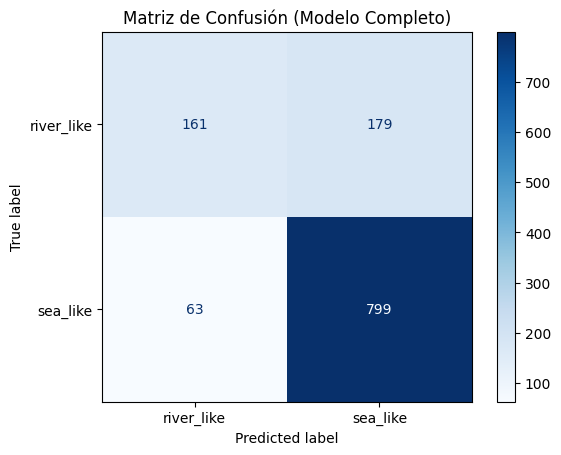

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Generando la Matriz de Confusión del Modelo Completo ---

print("--- Matriz de Confusión (Modelo Completo) ---")

cm_completo = confusion_matrix(y_test_c, y_pred_c)

# Se crea la visualización
# Se utiliza el objeto 'le' (LabelEncoder) para obtener los nombres de las clases
dispc = ConfusionMatrixDisplay(confusion_matrix=cm_completo, display_labels=le.classes_)

# Se muestra el gráfico
dispc.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión (Modelo Completo)")
plt.show()

In [18]:
#bloque16
#dataset completo con RandonForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [42]:
tuned_parameters = [
    {"n_estimators": [50, 100, 150], "max_depth": [3, 5, 7], "max_features": ["sqrt", "log2"]},
]

In [43]:
scores = ["f1_weighted"]

In [44]:
grid_search_tree = GridSearchCV(
    RandomForestClassifier(), tuned_parameters, scoring=scores, refit="f1_weighted", cv=5, verbose=3
)

In [45]:
X_train_c_reshaped=np.reshape(X_train_c, (X_train_c.shape[0], -1))
X_test_c_reshaped=np.reshape(X_test_c, (X_test_c.shape[0], -1))

In [46]:
grid_search_tree.fit(X_train_c_reshaped, y_train_c)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_depth=3, max_features=sqrt, n_estimators=50; f1_weighted: (test=0.715) total time=   0.0s
[CV 2/5] END max_depth=3, max_features=sqrt, n_estimators=50; f1_weighted: (test=0.728) total time=   0.0s
[CV 3/5] END max_depth=3, max_features=sqrt, n_estimators=50; f1_weighted: (test=0.701) total time=   0.0s
[CV 4/5] END max_depth=3, max_features=sqrt, n_estimators=50; f1_weighted: (test=0.711) total time=   0.0s
[CV 5/5] END max_depth=3, max_features=sqrt, n_estimators=50; f1_weighted: (test=0.725) total time=   0.0s
[CV 1/5] END max_depth=3, max_features=sqrt, n_estimators=100; f1_weighted: (test=0.715) total time=   0.1s
[CV 2/5] END max_depth=3, max_features=sqrt, n_estimators=100; f1_weighted: (test=0.725) total time=   0.1s
[CV 3/5] END max_depth=3, max_features=sqrt, n_estimators=100; f1_weighted: (test=0.699) total time=   0.1s
[CV 4/5] END max_depth=3, max_features=sqrt, n_estimators=100; f1_weighted: (tes

,estimator,RandomForestClassifier()
,param_grid,"[{'max_depth': [3, 5, ...], 'max_features': ['sqrt', 'log2'], 'n_estimators': [50, 100, ...]}]"
,scoring,['f1_weighted']
,n_jobs,None
,refit,'f1_weighted'
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [47]:
best_tree_model=grid_search_tree.best_estimator_
best_tree_model

,n_estimators,100
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
grid_search_tree.best_score_

np.float64(0.77944518449123)

In [49]:
grid_search_tree.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}

In [50]:
y_pred_tree_c = grid_search_tree.predict(X_test_c_reshaped)

print("Accuracy:", accuracy_score(y_test_c, y_pred_tree_c))
print(classification_report(y_test_c, y_pred_tree_c))

Accuracy: 0.800332778702163
              precision    recall  f1-score   support

           0       0.73      0.46      0.57       340
           1       0.82      0.93      0.87       862

    accuracy                           0.80      1202
   macro avg       0.77      0.70      0.72      1202
weighted avg       0.79      0.80      0.78      1202



--- Matriz de Confusión (Modelo Completo con GridSearch) ---


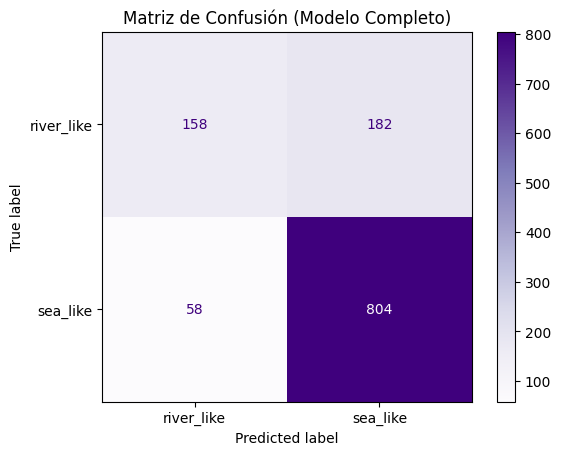

In [52]:
#falta matriz de confusion
# --- Matriz de Confusión del Modelo Completo con GridSearch---

print("--- Matriz de Confusión (Modelo Completo con GridSearch) ---")

# Calculamos la matriz con los resultados del último modelo
cm_completo = confusion_matrix(y_test_c, y_pred_tree_c)

# Creamos la visualización usando el LabelEncoder 'le' para los nombres
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_completo, 
    display_labels=le.classes_
)

# Mostramos el gráfico
disp.plot(cmap=plt.cm.Purples) # Usamos otro color para diferenciarlo
plt.title("Matriz de Confusión (Modelo Completo)")
plt.show()

In [33]:
#shap
import shap
shap.initjs()

C:\Users\isita\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
explainer_tree = shap.KernelExplainer(best_tree_model.predict, shap.utils.sample(X_train_c_reshaped,10))

In [35]:
shap_values_tree = explainer_tree(X_test_c_reshaped)

100%|██████████████████████████████████████████████████████████████████████████████| 1202/1202 [00:35<00:00, 33.98it/s]


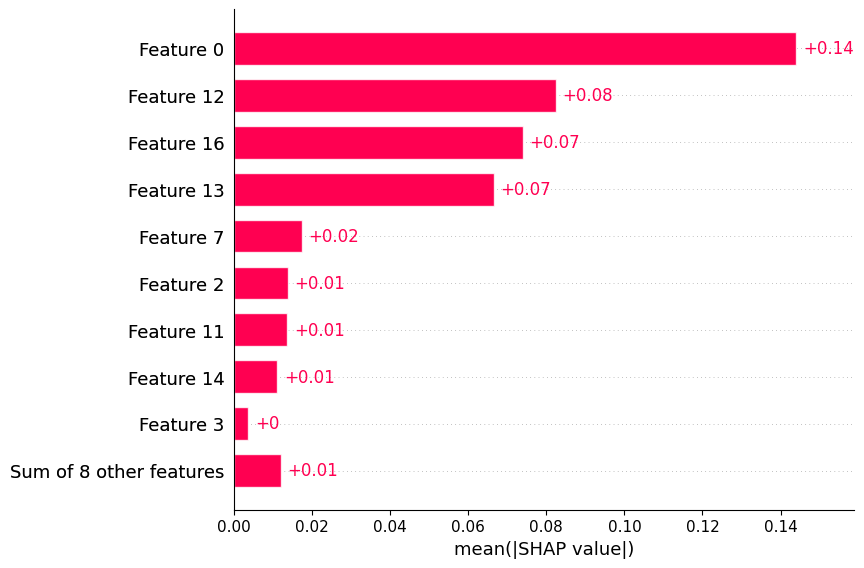

In [36]:
shap.plots.bar(shap_values_tree)

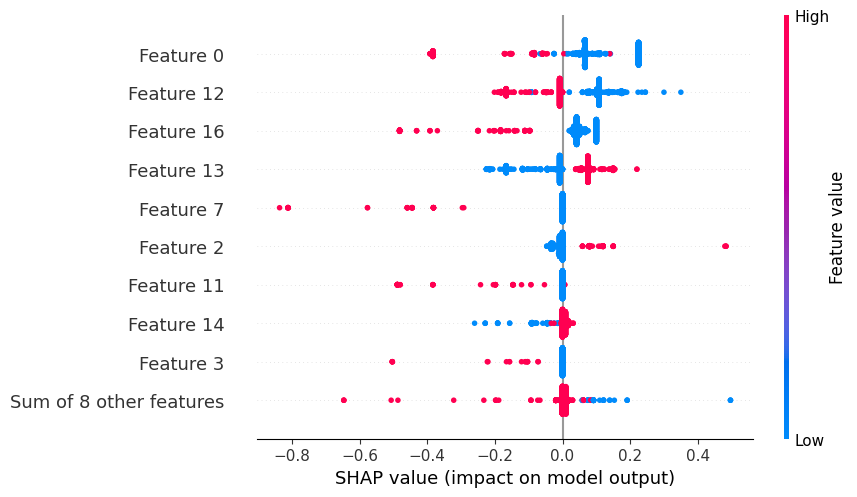

In [37]:
shap.plots.beeswarm(shap_values_tree)

In [38]:
X_final_completo = pd.get_dummies(X_completo)

# Lista de todos los nombres de las características en el orden correcto
lista_completa_de_nombres = X_final_completo.columns

# Las primeras características más relevantes según SHAP
indices_importantes = [0, 16, 12, 13, 7, 2,11,14,4]

print("--- Las características más importantes según el gráfico SHAP son: ---")

# Usamos un bucle para encontrar el nombre que corresponde a cada índice
for indice in indices_importantes:
    nombre_real = lista_completa_de_nombres[indice]
    print(f"  -> Feature {indice}: {nombre_real}")

--- Las características más importantes según el gráfico SHAP son: ---
  -> Feature 0: special_extra_dark
  -> Feature 16: waves_still
  -> Feature 12: reflections_moderate
  -> Feature 13: reflections_none
  -> Feature 7: special_plants_debris
  -> Feature 2: special_glitter
  -> Feature 11: reflections_heavy
  -> Feature 14: waves_moderate
  -> Feature 4: special_wakes


In [39]:
#Modelado con un menor numero de características
#Lista de las características originales a conservar basado en la imprtancia vista en SHAP
features_relevantes = [
    'reflections',
    'waves',
    'special_extra_dark',
    'special_plants_debris'
   # 'special_glitter',
    #'special_fog'
]

# 2. Se crea un DataFrame simplificado seleccionando solo las columnas de "features_relevantes"
X_modelo_final = X_completo[features_relevantes]

print("DataFrame para el modelo final (solo con características relevantes):")
X_modelo_final.head()

DataFrame para el modelo final (solo con características relevantes):


,reflections,waves,special_extra_dark,special_plants_debris
0,moderate,still,0,0
1,heavy,still,0,0
2,heavy,still,0,0
3,heavy,still,0,0
4,heavy,still,0,0


In [40]:
# --- Entrenamiento del Modelo Final Simplificado ---

# 1. Preparación: Convertir a formato numérico y limpiar
X_final_numerico = pd.get_dummies(X_modelo_final)
y_limpio = y.dropna() # 'y' es tu variable objetivo original
X_final_numerico = X_final_numerico.loc[y_limpio.index]
y_numerico = le.fit_transform(y_limpio)

# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_final_numerico, y_numerico, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_numerico
)

# 3. Entrenamiento y Evaluación
bosque_final = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
bosque_final.fit(X_train, y_train)

# 4. Métricas
y_pred = bosque_final.predict(X_test)
print(f"Accuracy (Modelo Final Simplificado): {accuracy_score(y_test, y_pred):.4f}")
print("**********************************************")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy (Modelo Final Simplificado): 0.7928
**********************************************
              precision    recall  f1-score   support

  river_like       0.71      0.45      0.55       340
    sea_like       0.81      0.93      0.87       862

    accuracy                           0.79      1202
   macro avg       0.76      0.69      0.71      1202
weighted avg       0.78      0.79      0.78      1202



--- Matriz de Confusión (Modelo Ultra-Simplificado) ---


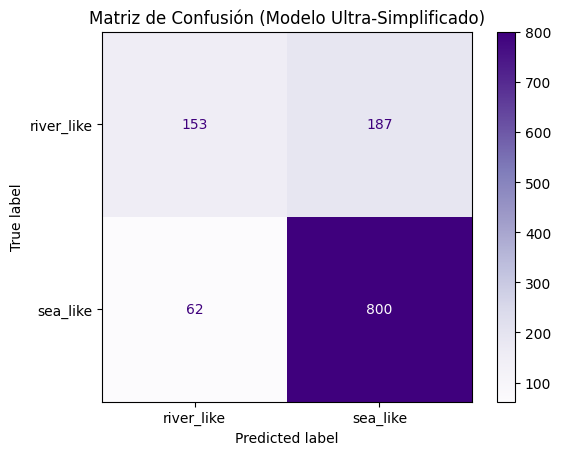

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- Matriz de Confusión del Modelo Ultra-Simplificado ---

print("--- Matriz de Confusión (Modelo Ultra-Simplificado) ---")

# Calculamos la matriz con los resultados del último modelo
cm_ultra_simplificado = confusion_matrix(y_test, y_pred)

# Creamos la visualización usando el LabelEncoder 'le' para los nombres
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_ultra_simplificado, 
    display_labels=le.classes_
)

# Mostramos el gráfico
disp.plot(cmap=plt.cm.Purples) # Usamos otro color para diferenciarlo
plt.title("Matriz de Confusión (Modelo Ultra-Simplificado)")
plt.show()

In [54]:
#modelo simplificado.. falta hacer uno que no tenga ligthning
#en base a los resultados anteriores se pueden ver cuales son las variables y sus respectivas importancias en la prediccion de
#la variable objetivo.
#BLoque 13
#lo que sigue es eliminar las caracteristcias de menor importancia de X_completo.
# --- Se crea un DataFrame X más simple eliminando el ruido ---

print("Características originales en X_completo:")
print(list(X_completo.columns))

# Definimos las columnas que, según el análisis, no aportan valor
columnas_a_eliminar = ['lighting'] 

# Creamos el nuevo DataFrame sin esas columnas
X_simplificado = X_completo.drop(columns=columnas_a_eliminar)

print("\nCaracterísticas en X_simplificado (después de eliminar 'lighting'):")
print(list(X_simplificado.columns))


Características originales en X_completo:
['lighting', 'reflections', 'waves', 'special_extra_dark', 'special_extra_bright', 'special_glitter', 'special_dirty_lens', 'special_wakes', 'special_rain', 'special_fog', 'special_plants_debris']

Características en X_simplificado (después de eliminar 'lighting'):
['reflections', 'waves', 'special_extra_dark', 'special_extra_bright', 'special_glitter', 'special_dirty_lens', 'special_wakes', 'special_rain', 'special_fog', 'special_plants_debris']


In [56]:
# --- Se repite el proceso con el DataFrame simplificado ---
#from sklearn.metrics import accuracy_score, classification_report 

# 1. Convertir a formato numérico (One-Hot Encoding)
X_simplificado_numerico = pd.get_dummies(X_simplificado)

# 'y_limpio' y 'y_numerico' definidos previamente, se simplifican
X_final_simplificado = X_simplificado_numerico.loc[y_limpio.index]

# 2. División de datos en Entrenamiento y Prueba
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_final_simplificado, y_numerico, 
    test_size=0.3, 
    random_state=42, 
    stratify=y_numerico
)

# ENTRENAMIENTO Y EVALUACIÓN (usando RandomForest como ejemplo)
print("\n--- Re-entrenando RandomForest con el set de datos simplificado ---")
modelo_rf_simplificado = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
modelo_rf_simplificado.fit(X_train_s, y_train_s)

# Predicciones
y_pred_s = modelo_rf_simplificado.predict(X_test_s)

# Evaluar
print(f"\nAccuracy (Modelo Completo): 0.8003")
print(f"Accuracy (Modelo Simplificado): {accuracy_score(y_test_s, y_pred_s):.4f}")

print("\nReporte de Clasificación (Modelo Simplificado):")
print(classification_report(y_test_s, y_pred_s, target_names=le.classes_))


--- Re-entrenando RandomForest con el set de datos simplificado ---

Accuracy (Modelo Completo): 0.8003
Accuracy (Modelo Simplificado): 0.7987

Reporte de Clasificación (Modelo Simplificado):
              precision    recall  f1-score   support

  river_like       0.72      0.48      0.57       340
    sea_like       0.82      0.93      0.87       862

    accuracy                           0.80      1202
   macro avg       0.77      0.70      0.72      1202
weighted avg       0.79      0.80      0.78      1202



--- Matriz de Confusión (Modelo Simplificado) ---


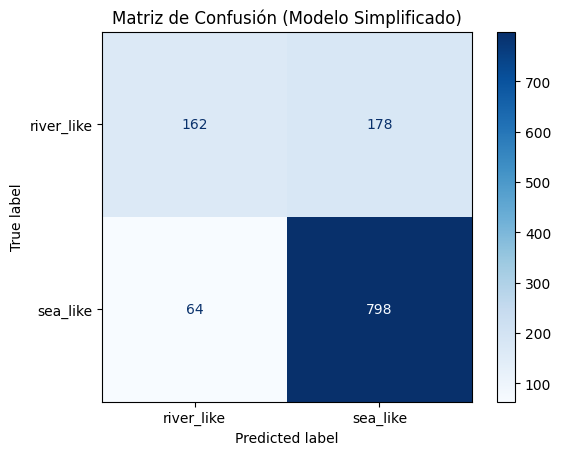

In [57]:
# --- Generando la Matriz de Confusión del Modelo Simplificado ---

print("--- Matriz de Confusión (Modelo Simplificado) ---")

cm_simplificado = confusion_matrix(y_test_s, y_pred_s)

# Se crea la visualización
# Se utiliza el objeto 'le' (LabelEncoder) para obtener los nombres de las clases
disp = ConfusionMatrixDisplay(confusion_matrix=cm_simplificado, display_labels=le.classes_)

# Se muestra el gráfico
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión (Modelo Simplificado)")
plt.show()